## Naive Bayes Classiifer

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

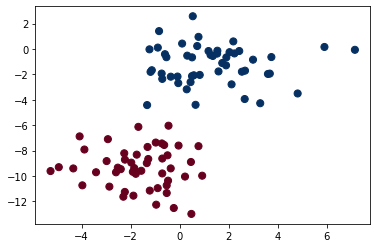

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers =2, random_state=2, cluster_std =1.5)
plt.scatter(X[:,0],X[:,1], c =y, s=50, cmap='RdBu')

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)


GaussianNB()

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

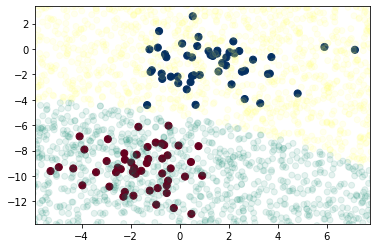

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = ynew, cmap = 'summer', alpha =0.1)
plt.axis(lim)

In [6]:
# Here we see that Naive Bayes doesnot necessarily returns linear decision boundary, which in this case is slightly quadratic

In [7]:
# We can caluclatee probabilities of getting probablities for each class as below

yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

#### Multinomial Naive Bayes

In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
# For simplicity we considwer only few categories and perform the analysis
labels = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset = 'train', categories = labels)
test = fetch_20newsgroups(subset = 'test', categories = labels)

In [10]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [11]:
# In order to convert the mail into vector of numbers, we will use TD-IDF vectorizer and create pipepline that attaches it to a multinomial naive bayes classifier

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [14]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [15]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(91.68, 0.5, 'predict label')

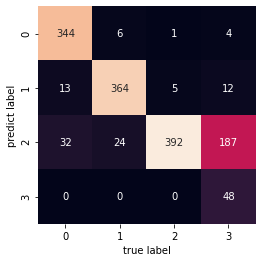

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predict label')

In [23]:
def predict_category(s, train = train, model= model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [24]:
predict_category('sending a payload to the ISS')

'sci.space'

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

Resourcce
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
Feature Engineering https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html